In [1]:
import xcast as xc 
import xarray as xr 
import cartopy.crs as ccrs 

obs = xr.open_dataset('data/OBS_JJA.nc').precip.expand_dims({'M':[0]})

In [2]:
eof = xc.EOF(modes=3, latitude_weighting=True) 
eof.fit(obs)
scores = eof.transform(obs)

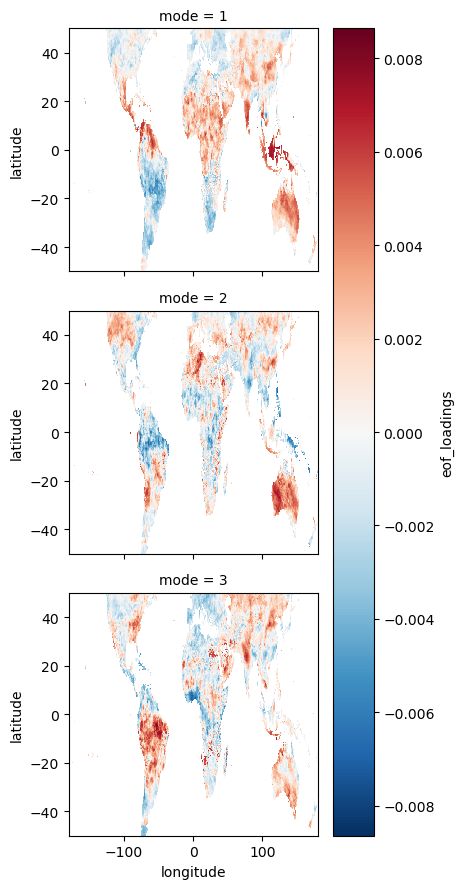

In [3]:
eof.eof_loadings.plot(col='mode', col_wrap=1)

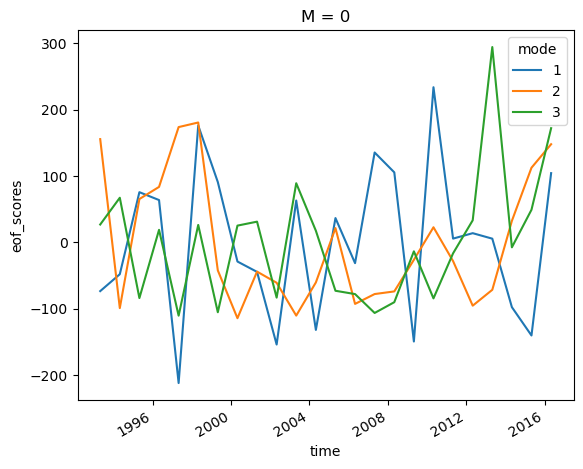

In [4]:
eof.eof_scores.plot(hue='mode')

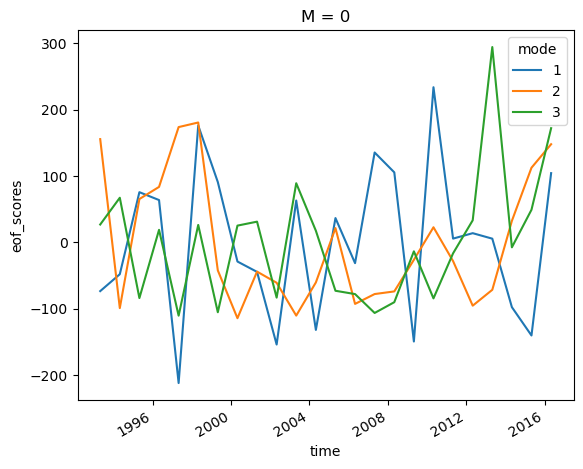

In [5]:
scores.plot(hue='mode')

In [6]:
eof.eof_variance_explained * 100

<xarray.DataArray 'percent_variance_explained' (M: 1, mode: 3)>
array([[6.710149, 5.814611, 5.751037]], dtype=float32)
Coordinates:
  * mode     (mode) int64 1 2 3
  * M        (M) int64 0

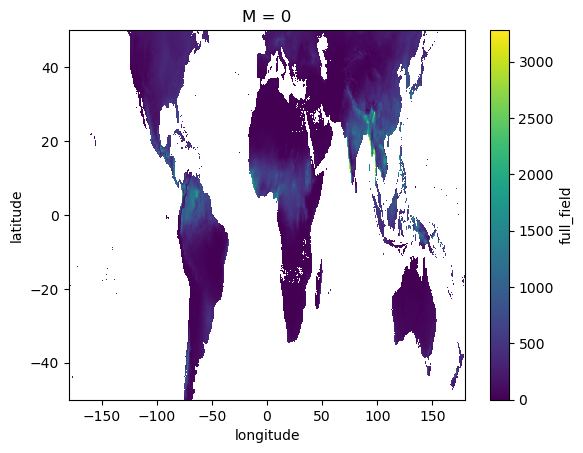

In [7]:
eof.inverse_transform(scores).mean('time').plot()
